In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import random
import math

In [31]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

def plot_solution(solution, df):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [237]:
def triangle_swap(solution):
    i1, i2, i3 = random.sample(range(0, len(solution)-1), 3)
    new_solution = solution
    new_solution[i1], new_solution[i2], new_solution[i3] = new_solution[i2], new_solution[i3], new_solution[i1]
    return new_solution

def swap(solution):
    i1, i2 = random.sample(range(0, len(solution)-1), 2)
    new_solution = solution
    new_solution[i1], new_solution[i2] = new_solution[i2], new_solution[i1]
    return new_solution

def shuffle(solution):
    i1, i2 = random.sample(range(0, len(solution)-1), 2)
    sub = solution[i1:i2]
    random.shuffle(sub)
    solution[i1:i2] = sub
    return solution    

In [253]:
def sim_anneal(solution, df, K, stopK, alpha, ittol, elementary):
    assert alpha < 1, "choose a smaller alpha"
    all_dist = []
    sol = solution
    old_dist = total_distance(sol, df)
    i = 0
    while K > stopK and i < ittol:
        # elementary edit, triangle swap for now
        if elementary =="triangle":
            new_solution = triangle_swap(sol)
        elif elementary == "swap":
            new_solution = swap(sol)
        elif elementary == "shuffle":
            new_solution = shuffle(sol)
        else:
            raise ValueError
            
        new_dist = total_distance(new_solution, df)
        # decide whether to accept the new solution
        if new_dist < old_dist:
            print("found something better")
            sol = new_solution
            old_dist = total_distance(sol, df)
            all_dist.append(total_distance(sol, df))
        else:
            # accept with probability depending on temperature
            rand = np.random.random()
            prob = math.exp(total_distance(new_solution, df)- total_distance(solution, df)/K)
            if rand < prob:
                assert rand < prob
                solution = new_solution
        # decrease temperature
        i += 1
        K *= alpha 
        
    return sol, all_dist

In [53]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<AxesSubplot:xlabel='x', ylabel='y'>

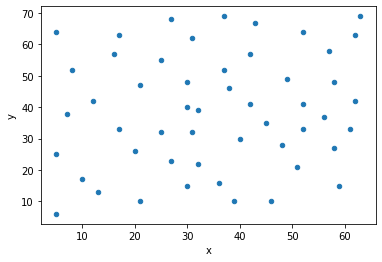

In [54]:
df.plot.scatter("x", "y")

In [55]:
df = df[0:10]
# tidy data
df = df.sort_values("x")

In [56]:
# find naive solution along 1 dimension
solution = []
for row in range(df.shape[0]):
    solution.append(df.iloc[row].name)

In [57]:
total_distance(solution, df)

279.24296426489747

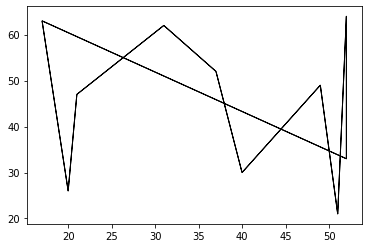

In [58]:
plot_solution(solution, df)

In [59]:
solution

['7', '4', '6', '8', '1', '5', '2', '10', '3', '9']

In [60]:
# brute force, very bad
i = 0
while True:
    random.shuffle(solution)
    if total_distance(solution, df) < 1200 or i > 1000:
        break
    i += 1

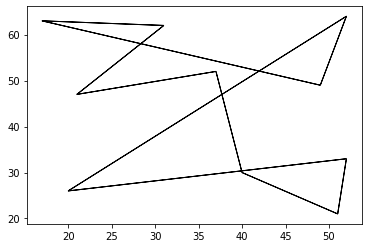

In [61]:
plot_solution(solution, df)

In [62]:
solution

['9', '4', '3', '2', '7', '8', '6', '1', '5', '10']

In [63]:
total_distance(solution, df)

229.94555316843667

In [257]:
sol, all_dist = sim_anneal(solution, df, 1, 0.000001, 0.99, 100000, "shuffle")

found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better
found something better


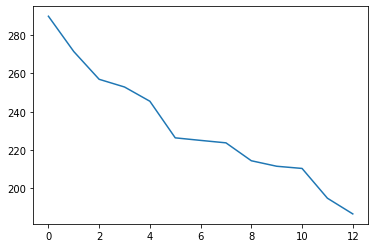

In [258]:
plt.plot(all_dist)

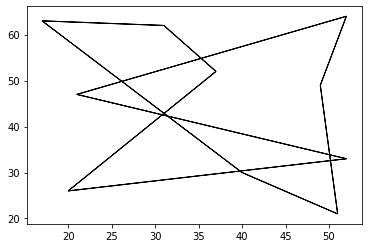

In [259]:
plot_solution(sol, df)

In [215]:
def two_opt(solution, df):
    

IndentationError: expected an indented block (<ipython-input-215-a1bad9fa2734>, line 2)

In [223]:
sol

['1', '4', '3', '6', '5', '10', '9', '2', '8', '7']